Import necessary libraries

In [1]:
from IPython.display import display, Math, Latex

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## Feature Extraction

* Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features).

* These new reduced set of features should then be able to summarize most of the information contained in the original set of features.

* In this way, a summarised version of the original features can be created from a combination of the original set.


### **1. DictVectorizer**

Many a times the data is present as a $\textbf {list of dictionary objects.}$

ML algorithms expect the data in **matrix form** with shape $(n,m)$ where $n$ is the number of samples and $m$ is the number of features.
 `Vectorizer` **converts** a list of dictionary objects to feature matrix.

Let's create a sample data for demo purpose containing `age` and `height` of children.
  Each record/sample is a dictionary with two keys `age` and `height` , and corresponding values.
  

In [2]:
from sklearn.feature_extraction import DictVectorizer

measurements = [
    {'city': 'Chennai', 'temperature': 33.},
    {'city': 'Kolkata', 'temperature': 18.},
    {'city': 'Delhi', 'temperature': 12.}]

In [3]:
vec = DictVectorizer()
vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  0.,  1., 18.],
       [ 0.,  1.,  0., 12.]])

In [4]:
vec.get_feature_names_out()

array(['city=Chennai', 'city=Delhi', 'city=Kolkata', 'temperature'],
      dtype=object)

### **2. PCA - Principal Component Analysis**

* PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance.

* It helps in reducing dimensions of a dataset, thus computational cost of next steps e.g. training a model, cross validation etc.

Let's generate some artificial data to better understand PCA :

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

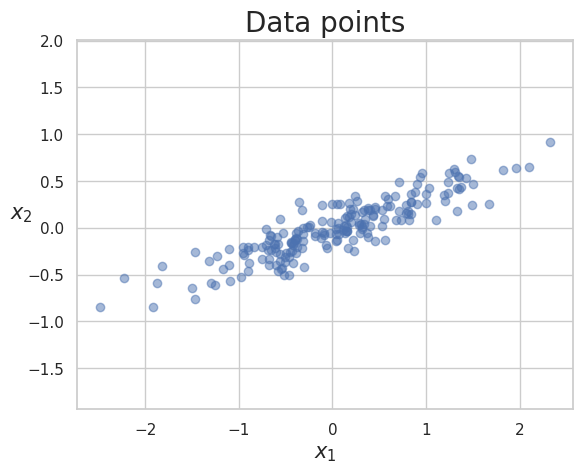

In [5]:
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size=20)

# set x and y labels
plt.xlabel('$x_1$', size=15)
plt.ylabel('$x_2$', size=15, rotation=0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal')


Let us fit a `PCA` transformer on this data and compute its two principal components:

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Let's print the principle axes, they are two 2D vectors for this example.

The PCA object returns them in the form of a matrix, where each column returns them in the form of a matrix, where each column represents a principle component:

In [7]:
print(f'The {pca.n_components_} principle axes are :\n', pca.components_)

The 2 principle axes are :
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Let's also look at the explained variance corresponding to each priciple axes.

In [8]:
print('Explained variance by each component : ', pca.explained_variance_)

Explained variance by each component :  [0.7625315 0.0184779]


To better understand PCA, let's visualize these principle axes :

* There are two principle axes **C1 and C2**. They are orthogonal to each other. An additional vector **C3** is also mentioned for comparision.

* The lengths of **C1** and **C2** are taken as square root of respective explained variance. The length of the vector implies how important that vector is.

In [9]:
# draw projections of data points on different vectors

projections = X@pca.components_
print(projections.shape)

c3 = X[2]

arbitary_projection = X@c3
print(arbitary_projection.shape)

(200, 2)
(200,)


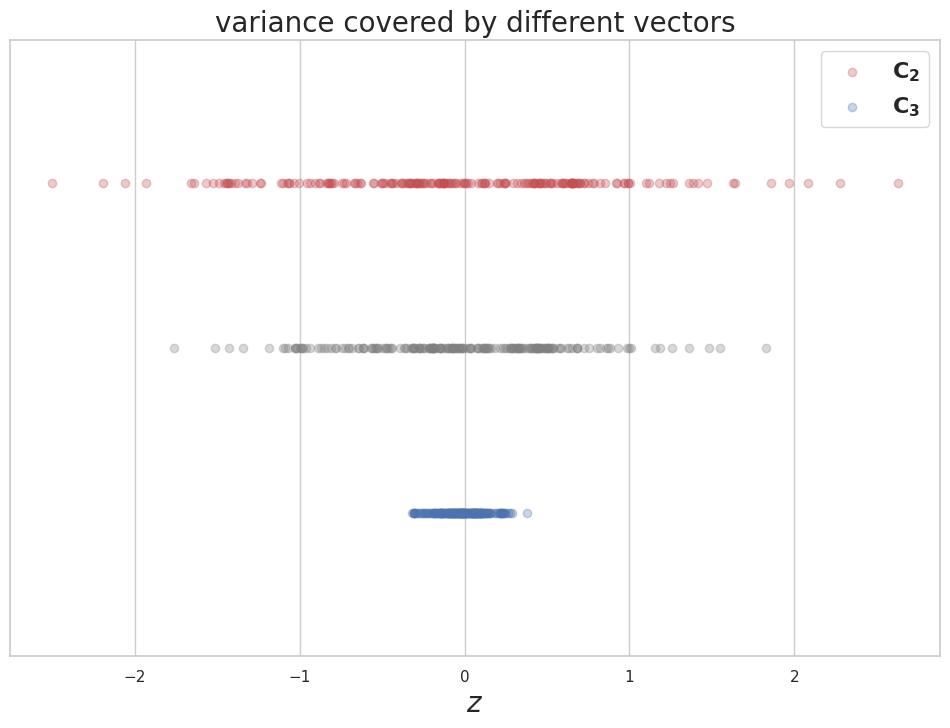

In [10]:
plt.figure(figsize=(12,8))

plt.scatter(projections[:, 0], 1+np.zeros((200, 1)), alpha=0.3, color='r')
plt.scatter(projections[:, 1], -1+np.zeros((200, 1)), alpha=0.3, color='b')
plt.scatter(arbitary_projection, np.zeros((200,)), alpha=0.3, color='grey')

plt.legend(['$\mathbf{C_2}$', '$\mathbf{C_3}$'], prop={'size': 16})
plt.title("variance covered by different vectors", size=20)

plt.ylim([-1.5, 1.5])
plt.yticks([], [])
plt.axis('equal')
plt.grid(True)
plt.xlabel('$z$', size=20)
plt.show()

*Reducing Dimensions*

We can use PCA to reduce number of dimensions of a dataset. The components that are least important i.e. their explained variance is low, are removed and only those components that capture high(i.e. desired) amount of variance are kept.

Let's reduce the dimension of our data from 2 to 1. We can observe the transformed data has only 1 feature.

In [11]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

print('Original shape :', X.shape)
print('Transformed shape :',X_pca.shape)

Original shape : (200, 2)
Transformed shape : (200, 1)


To better understand what happened to our data, let's visualize our original data and the reduced data.

To do this, we will need to bring the transformed data into space or original data, which can be accomplished by `inverse_transform` method of `PCA` object.


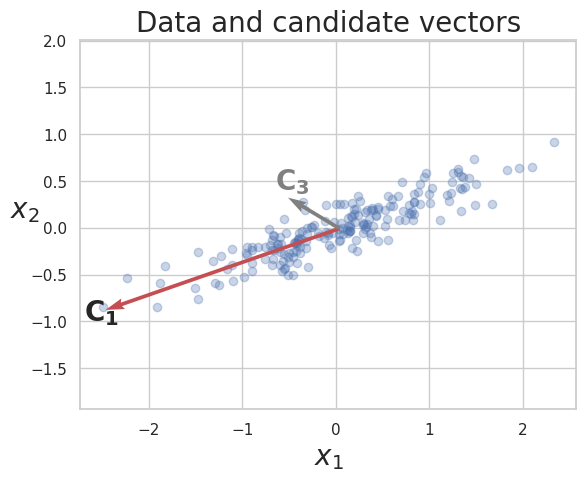

In [12]:
plt.figure()
plt.title('Data and candidate vectors', size=20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation=0)

# plot data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_,
pca.components_,['$\mathbf{C_1}$', '$\mathbf{C_2}$'], ['r', 'b']):
    v = principal_axis * np.sqrt(length)
    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis
    plt.quiver(*v0, *(v1-v0), scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis
    plt.text(*(3.4*v1), axis_name, size=20)

# draw 3rd component
lengths = np.eye(2)
np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5, 0.3]

plt.quiver(*pca.mean_,*(1.1*(c3-pca.mean_)), scale=1, scale_units='xy',
color='grey')

# label the  principal axis
plt.text(*(1.4*c3),'$\mathbf{C_3}$',size=20,color='grey')

plt.axis('equal')
plt.show()

From above chart it is clear that the new/transformed data points are now projected on  C1  vector.